In [ ]:
# 0 下载config文件并解压数据集分别到mmdetection和mmpose文件夹的data文件夹中
# 略

In [3]:
# 1 进入mmdetection路径
import os
os.chdir('mmdetection')

In [ ]:
# 2.1 训练RTMDet模型 
#建议在命令行中运行
!python tools/train.py data/rtmdet_tiny_ear.py

In [4]:
# 2.2 在测试集上评估模型精度
!python tools/test.py data/rtmdet_tiny_ear.py \
                      work_dirs/rtmdet_tiny_ear/epoch_200.pth

06/05 20:45:22 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.16 (default, Mar  2 2023, 03:21:46) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1903595066
    GPU 0: NVIDIA GeForce RTX 3080 Ti
    CUDA_HOME: /usr/local/cuda-11.1
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=comp

06/05 20:45:26 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 20:45:26 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
(NORMAL      ) PipelineSwitchHoo

In [5]:
# 2.3 训练结果可视化
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import matplotlib 
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 载入训练日志
log_path = 'work_dirs/rtmdet_tiny_ear/20230605_200555/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
print("Length of json list is",len(json_list))
print(eval(json_list[4]))

df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)
print(df_train.columns)

Length of json list is 4257
{'lr': 1.6055855855855853e-05, 'data_time': 0.6967856407165527, 'loss': 0.0973009154200554, 'loss_cls': 0.06669528633356095, 'loss_bbox': 0.030605627037584782, 'time': 0.8001877307891846, 'epoch': 1, 'memory': 2588, 'step': 5}


100%|█████████████████████████████████████| 4257/4257 [00:01<00:00, 3926.09it/s]

Index(['lr', 'data_time', 'loss', 'loss_cls', 'loss_bbox', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')


In [6]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

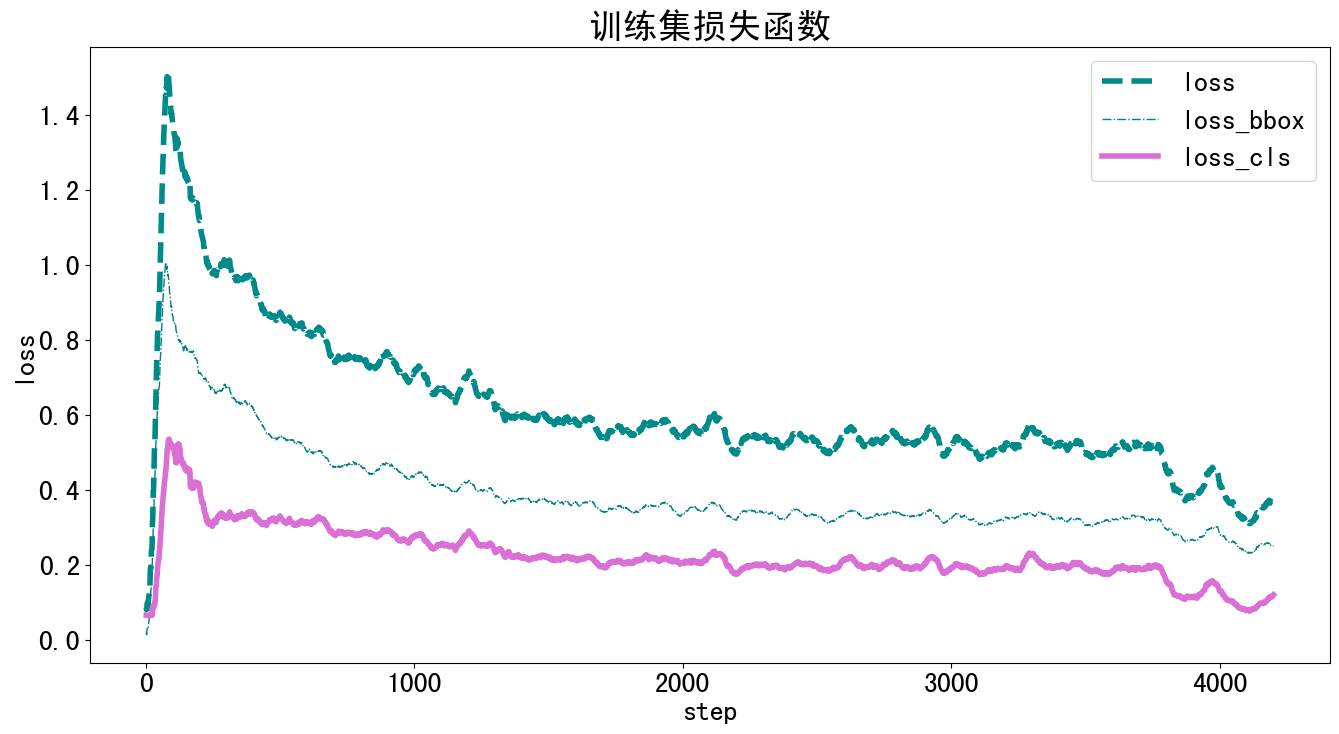

In [8]:
# 绘制训练集损失函数
metrics = ['loss', 'loss_bbox', 'loss_cls']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
plt.legend(fontsize=20)
plt.show()

In [9]:
print(df_test.columns)

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time',
       'time', 'step'],
      dtype='object')


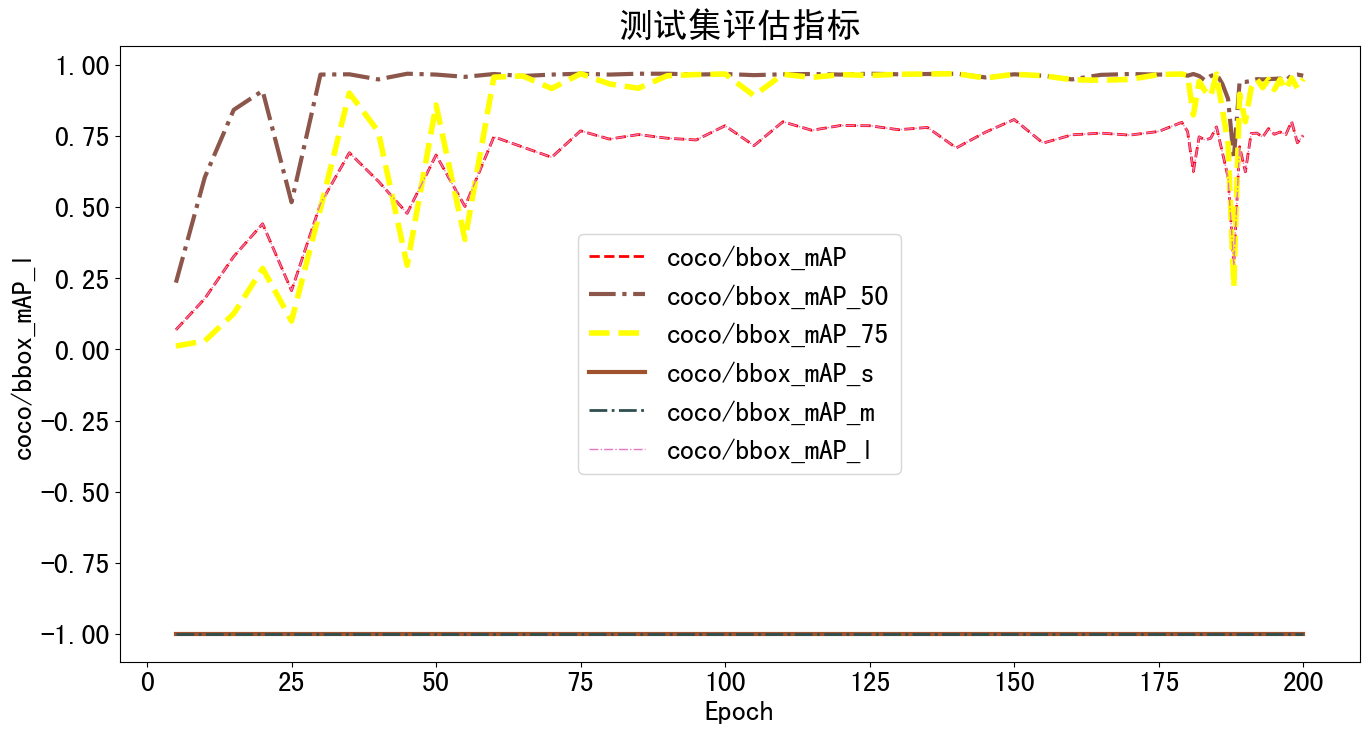

In [10]:
# 绘制测试集评估指标
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
plt.legend(fontsize=20)
plt.show()

In [12]:
# 2.4 轻量化转换
!python tools/model_converters/publish_model.py \
        work_dirs/rtmdet_tiny_ear/best_coco/bbox_mAP_epoch_150.pth \
        checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555.pth

# !python tools/model_converters/publish_model.py \
#         work_dirs/faster_r_cnn_triangle/epoch_50.pth \
#         checkpoint/faster_r_cnn_triangle_epoch_50_202305120846.pth

06/05 20:53:33 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 20:53:33 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 20:53:33 - mmengine - INFO - The published model is saved at checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth.


In [18]:
# 2.5 自定义的图像预测结果
# RTMDet
!python demo/image_demo.py \
        data/test_ear/ear_1.jpeg \
        data/rtmdet_tiny_ear.py \
        --weights checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth \
        --out-dir outputs/W1_OUT_rtmdet_tiny_ear \
        --device cuda:0 \
        --pred-score-thr 0.3

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth
06/05 21:02:16 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/05 21:02:16 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/worker20/.conda/envs/MMPose/lib/python3.8/site-packages/torch/functional.p;62;57;59m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
y:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required 
to pass the indexing argument. (Triggered internally at  
../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [42]:
# 2.6 自定义的视频预测结果
# RTMDet
!python demo/video_demo.py \
        data/test_ear/ear_2.mp4 \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth \
        --device cuda:0 \
        --score-thr 0.6 \
        --out outputs/W1_out_video_rtmdet_tiny_ear.mp4

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth
06/05 22:26:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/213, elapsed: 0s, ETA:/home/worker20/.conda/envs/MMPose/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 213/213, 11.7 task/s, elapsed: 18s, ETA:     0s


In [ ]:
# 3.1 训练RTMPose模型
#建议在命令行中运行
!python tools/train.py data/rtmpose-s-ear.py

In [ ]:
# 3.2 测试集上评估精度
!python tools/test.py data/rtmpose-s-ear.py \
                      work_dirs/rtmpose-s-ear/epoch_100.pth

In [33]:
# 3.3 训练结果可视化
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
import matplotlib 
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 载入训练日志
log_path = 'work_dirs/rtmpose-s-ear/20230605_210403/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
print("Length of json list is",len(json_list))
print(eval(json_list[4]))

df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)
print(df_train.columns)

Length of json list is 620
{'lr': 0.0008421368421052633, 'data_time': 4.048315048217773, 'loss': 0.4143911302089691, 'loss_kpt': 0.4143911302089691, 'acc_pose': 0.11904761904761904, 'time': 4.105608129501343, 'epoch': 1, 'memory': 1601, 'step': 5}


100%|███████████████████████████████████████| 620/620 [00:00<00:00, 3689.90it/s]

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')


In [23]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

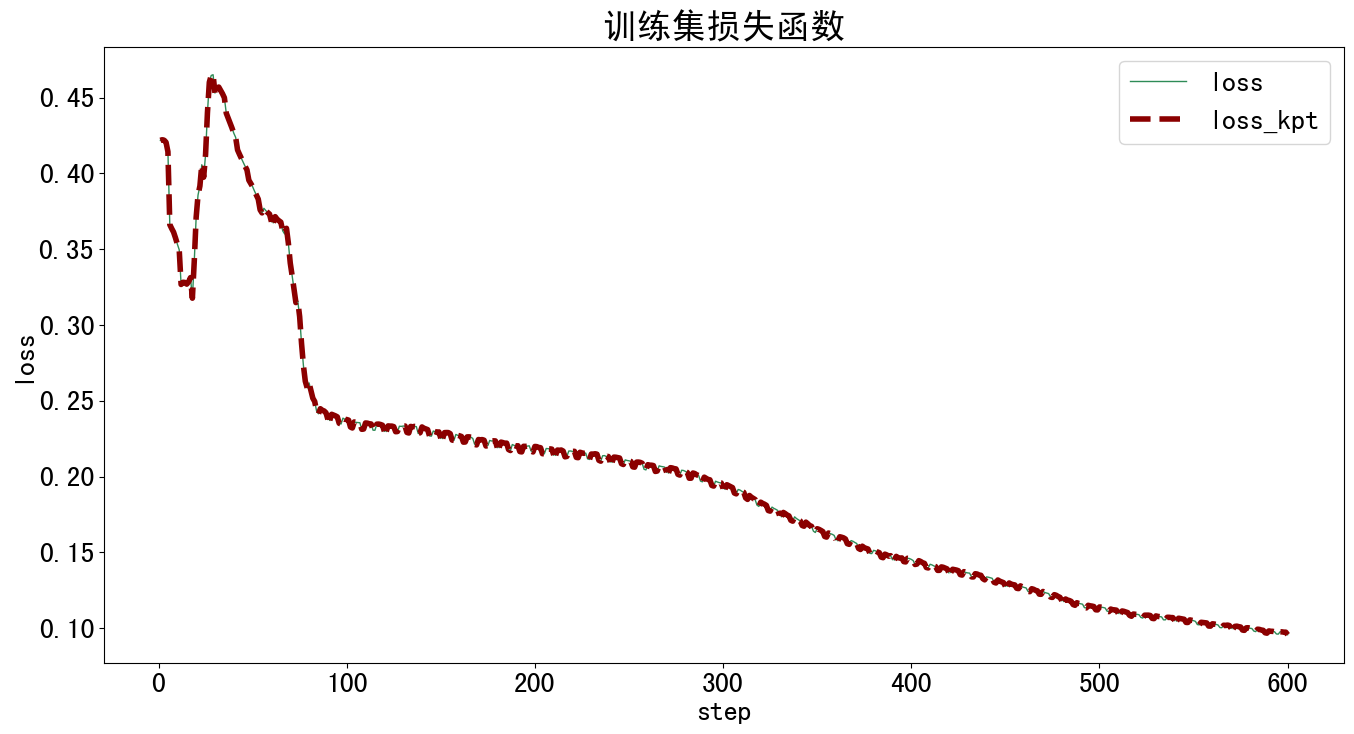

In [25]:
# 绘制训练集损失函数
metrics = ['loss', 'loss_kpt']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
plt.legend(fontsize=20)
plt.show()

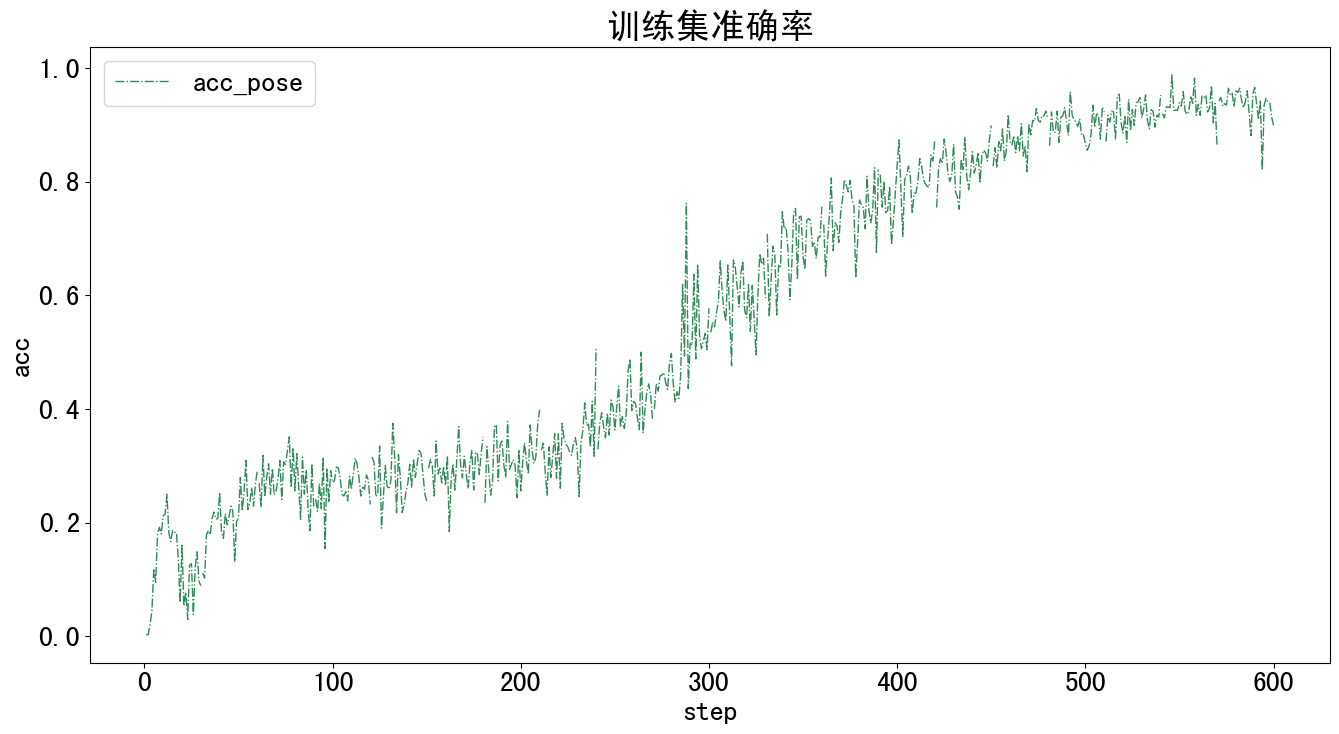

In [26]:
# 绘制训练集准确率
metrics = ['acc_pose']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('acc', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')
plt.legend(fontsize=20)
plt.show()

In [34]:
print(df_test.columns)

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')


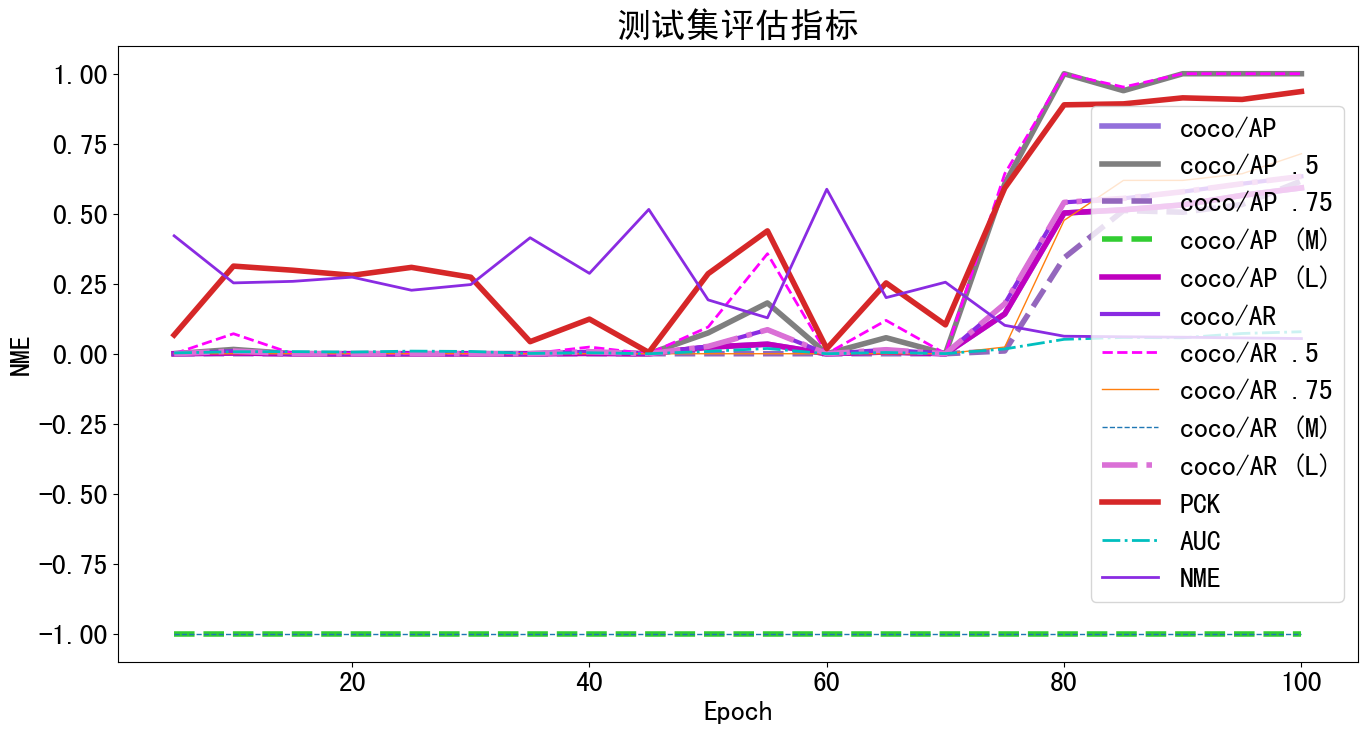

In [39]:
# 绘制测试集评估指标
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 
           'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
plt.legend(fontsize=20)
plt.show()

In [37]:
# 3.4 轻量化转换
!python tools/model_converters/publish_model.py \
        work_dirs/rtmpose-s-ear/best_PCK_epoch_100.pth \
        checkpoint/rtmpose-s-ear_epoch_100_20230605210403.pth

06/05 21:55:59 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 21:55:59 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 21:55:59 - mmengine - INFO - The published model is saved at checkpoint/rtmpose-s-ear_epoch_100_20230605210403-b179f36b.pth.


In [ ]:
# 在mmpose文件夹下运行，要把上面用到的文件也放到mmpose下

In [41]:
# 3.5 自定义的图像预测结果
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear_epoch_100_20230605210403-b179f36b.pth \
        --input data/test_ear/ear_1.jpeg \
        --output-root outputs/W1_OUT_RTMPose_ear \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

python: can't open file 'demo/topdown_demo_with_mmdet.py': [Errno 2] No such file or directory


In [44]:
# 3.5 自定义的视频预测结果
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_ear.py \
        checkpoint/rtmdet_tiny_ear_epoch_150_20230605200555-f0d5523d.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear_epoch_100_20230605210403-b179f36b.pth \
        --input data/test_ear/ear_2.mp4 \
        --output-root outputs/W1_OUT_RTMPose_ear.mp4 \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

        


python: can't open file 'demo/topdown_demo_with_mmdet.py': [Errno 2] No such file or directory
